In [535]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 1
HEADER_LINES = 2

PARTICIPANTE = 10

ATIVIDADE = 'AVD'
MARCHA = 'D'
SEQUENCIA = 2
SENSOR = 'HR'

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv')
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')


Dataset/Participante 10/V10_AVD_D_2/HR.csv
Dataset/Participante 10/V10_AVD_D_2/tags.csv
Lifesenior/AVD_D_2/V10_AVD_D_2.csv


In [536]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'hr'})
 init_time_measure = data.iloc[0,0]
 print(data)
 print(init_time_measure)

              hr
0   1.660937e+09
1   1.000000e+00
2   4.900000e+01
3   6.400000e+01
4   5.900000e+01
5   5.825000e+01
6   5.760000e+01
7   5.717000e+01
8   5.671000e+01
9   6.200000e+01
10  6.622000e+01
11  6.950000e+01
12  7.191000e+01
13  7.408000e+01
14  7.592000e+01
15  7.757000e+01
16  7.893000e+01
17  8.019000e+01
18  8.129000e+01
19  8.222000e+01
20  8.311000e+01
21  8.380000e+01
22  8.443000e+01
23  8.495000e+01
24  8.543000e+01
25  8.583000e+01
26  8.628000e+01
1660937091.0


In [537]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660937e+09
1  1.660937e+09
(2, 1)


In [538]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660937089.23


In [539]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
print(lines_to_cut_init)
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
if(lines_to_cut_init <= (HEADER_LINES+1)):
    lines_to_cut_init=(HEADER_LINES+1)
print(lines_to_cut_init)

-1.7699999809265137
3


In [540]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
print(lines_to_cut_end)
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES+1
print(lines_to_cut_end)

16.91000008583069
22


(19, 1)
       hr
3   64.00
4   59.00
5   58.25
6   57.60
7   57.17
8   56.71
9   62.00
10  66.22
11  69.50
12  71.91
13  74.08
14  75.92
15  77.57
16  78.93
17  80.19
18  81.29
19  82.22
20  83.11
21  83.80


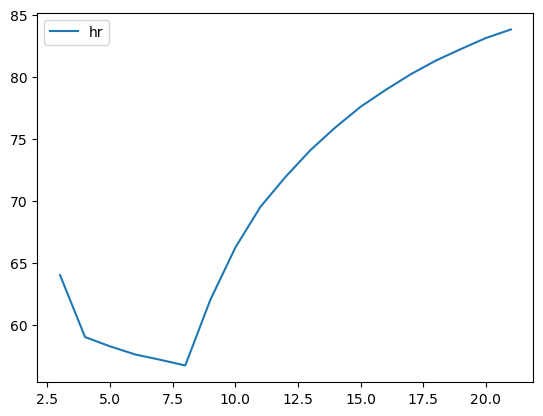

In [541]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]
print(formatted_data.shape)
formatted_data.plot()
print(formatted_data)

(608, 1)


<Axes: >

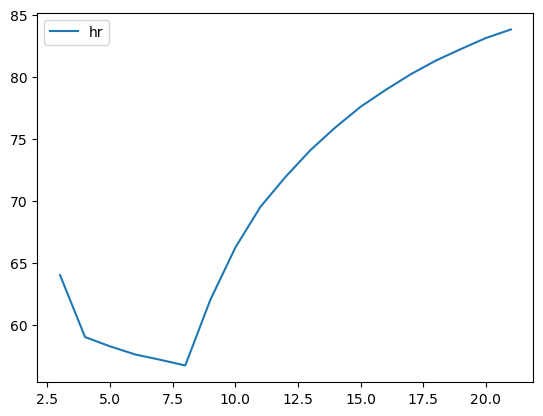

In [542]:
#upssampling from 4 to 32
formatted_data = formatted_data.loc[formatted_data.index.repeat(32)]
print(formatted_data.shape)
formatted_data.plot()

print(formatted_data.shape)

In [543]:
print(formatted_data)

      hr
3   64.0
3   64.0
3   64.0
3   64.0
3   64.0
..   ...
21  83.8
21  83.8
21  83.8
21  83.8
21  83.8

[608 rows x 1 columns]


In [544]:
dataLifeSenior = pd.read_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv',index_col=False)

diff_rows = formatted_data.shape[0]-dataLifeSenior.shape[0]
print('diff_rows ',diff_rows)
current=0
if(diff_rows > 0 and diff_rows < 33):
    while current < diff_rows:
        #remove last row
        formatted_data = formatted_data[:-1]
        current += 1
    dataLifeSenior["hr"] = formatted_data.values
    print(dataLifeSenior)
    #export the file to specific activity
    dataLifeSenior.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)
else:
    print('There is a problem here')

diff_rows  10
        acc_x     acc_y     acc_z   bvp       eda    hr
0   -0.312500 -0.906250  0.203125  0.12  0.398494  64.0
1   -0.296875 -0.937500  0.203125 -0.66  0.398494  64.0
2   -0.250000 -0.843750  0.234375 -1.88  0.398494  64.0
3   -0.234375 -0.890625  0.218750 -3.19  0.398494  64.0
4   -0.390625 -0.906250  0.265625 -4.45  0.398494  64.0
..        ...       ...       ...   ...       ...   ...
593 -0.250000 -0.984375  0.265625 -0.94  0.388243  83.8
594 -0.343750 -0.875000  0.250000 -1.41  0.388243  83.8
595 -0.296875 -0.875000  0.359375 -1.37  0.388243  83.8
596 -0.343750 -0.906250  0.265625 -0.74  0.388243  83.8
597 -0.343750 -0.921875  0.250000 -0.38  0.388243  83.8

[598 rows x 6 columns]
